## Analisis tipo likert

In [2]:
#import libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Reading in the Nobel Prize data
# build read_csv function
folder_name = 'datasets'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Mike-Portfolio\Mike-Portfolio\other.projects\{}'.format(folder_name)

def read_csv_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_csv('{}.csv'.format(file_name), sep=',', low_memory=False, on_bad_lines='skip')
    return df

likert = read_csv_fun('datasets','likert', dir)

# Taking a look at the first several winners
likert.head(2)

,Dimensión,Categoría,Subcategoría,Indicador,Afirmaciones,Número de afirmación dentro del cuestionario,formulaio.Correo,formulaio.Participante,formulaio.Afirmaciones,formulaio.Respuesta,Nivel de Desacuerdo
0,Concepción de ciencia,Ciencia positivista,Progresiva,"La ciencia avanza, de manera contínua, hacia u...",La ciencia se desarrolla constantemente hacia ...,1,angela.diosa@inemjose.edu.co,Angela,1,4,De acuerdo
1,Concepción de ciencia,Ciencia positivista,Progresiva,"La ciencia avanza, de manera contínua, hacia u...",La ciencia avanza tomando las explicaciones pr...,2,angela.diosa@inemjose.edu.co,Angela,2,4,De acuerdo


In [17]:
display(
    likert.head(5)
)

display(
    print(likert.isna().sum())
    )

display(
    print(len(likert))
    )

display(
    likert.info()
)

display(
    likert.value_counts("Categoría")
)

display(
    likert.value_counts("formulaio.Participante")
)

display(
    likert.value_counts("Dimensión")
)

,Dimensión,Categoría,Subcategoría,Indicador,Afirmaciones,Número de afirmación dentro del cuestionario,formulaio.Correo,formulaio.Participante,formulaio.Afirmaciones,formulaio.Respuesta,Nivel de Desacuerdo
0,Concepción de ciencia,Ciencia positivista,Progresiva,"La ciencia avanza, de manera contínua, hacia u...",La ciencia se desarrolla constantemente hacia ...,1,angela.diosa@inemjose.edu.co,Angela,1,4,De acuerdo
1,Concepción de ciencia,Ciencia positivista,Progresiva,"La ciencia avanza, de manera contínua, hacia u...",La ciencia avanza tomando las explicaciones pr...,2,angela.diosa@inemjose.edu.co,Angela,2,4,De acuerdo
2,Concepción de ciencia,Ciencia modelo-teórica,Instrumentales,"Los modelos cambian, se adaptan y evolucionan ...",Las explicaciones científicas no son definitiv...,3,angela.diosa@inemjose.edu.co,Angela,3,4,De acuerdo
3,Concepción de ciencia,Ciencia modelo-teórica,Instrumentales,"Los modelos cambian, se adaptan y evolucionan ...",Los modelos que estructuran el conocimiento ci...,4,angela.diosa@inemjose.edu.co,Angela,4,4,De acuerdo
4,Concepción de ciencia,Ciencia modelo-teórica,Provisionales,Los modelos obedecen a elementos contextuales,El desarrollo de los modelos científicos depen...,5,angela.diosa@inemjose.edu.co,Angela,5,4,De acuerdo


Dimensión                                       0
Categoría                                       0
Subcategoría                                    0
Indicador                                       0
Afirmaciones                                    0
Número de afirmación dentro del cuestionario    0
formulaio.Correo                                0
formulaio.Participante                          0
formulaio.Afirmaciones                          0
formulaio.Respuesta                             0
Nivel de Desacuerdo                             0
dtype: int64


None

216


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Dimensión                                     216 non-null    object
 1   Categoría                                     216 non-null    object
 2   Subcategoría                                  216 non-null    object
 3   Indicador                                     216 non-null    object
 4   Afirmaciones                                  216 non-null    object
 5   Número de afirmación dentro del cuestionario  216 non-null    int64 
 6   formulaio.Correo                              216 non-null    object
 7   formulaio.Participante                        216 non-null    object
 8   formulaio.Afirmaciones                        216 non-null    int64 
 9   formulaio.Respuesta                           216 non-null    int64 
 10  Ni

None

Categoría
Ciencia modelo-teórica    54
Ciencia positivista       54
Identidad científica      54
Identidad de profesor     54
Name: count, dtype: int64

formulaio.Participante
Angela        24
Criscar       24
Kalandraka    24
Karl          24
Kika07        24
L.G.M         24
Lala          24
Profe Mira    24
Tarzan        24
Name: count, dtype: int64

Dimensión
Concepción de ciencia                             108
Identidad de profesor vs. identidad científica    108
Name: count, dtype: int64

In [24]:
mtc_likert = likert.groupby('Categoría').agg(
    mean=("formulaio.Respuesta", "mean"),
    std=("formulaio.Respuesta", "std") 
)
print(mtc_likert)

                            mean       std
Categoría                                 
Ciencia modelo-teórica  3.888889  0.945030
Ciencia positivista     3.574074  1.159080
Identidad científica    3.055556  1.139624
Identidad de profesor   4.222222  0.839287


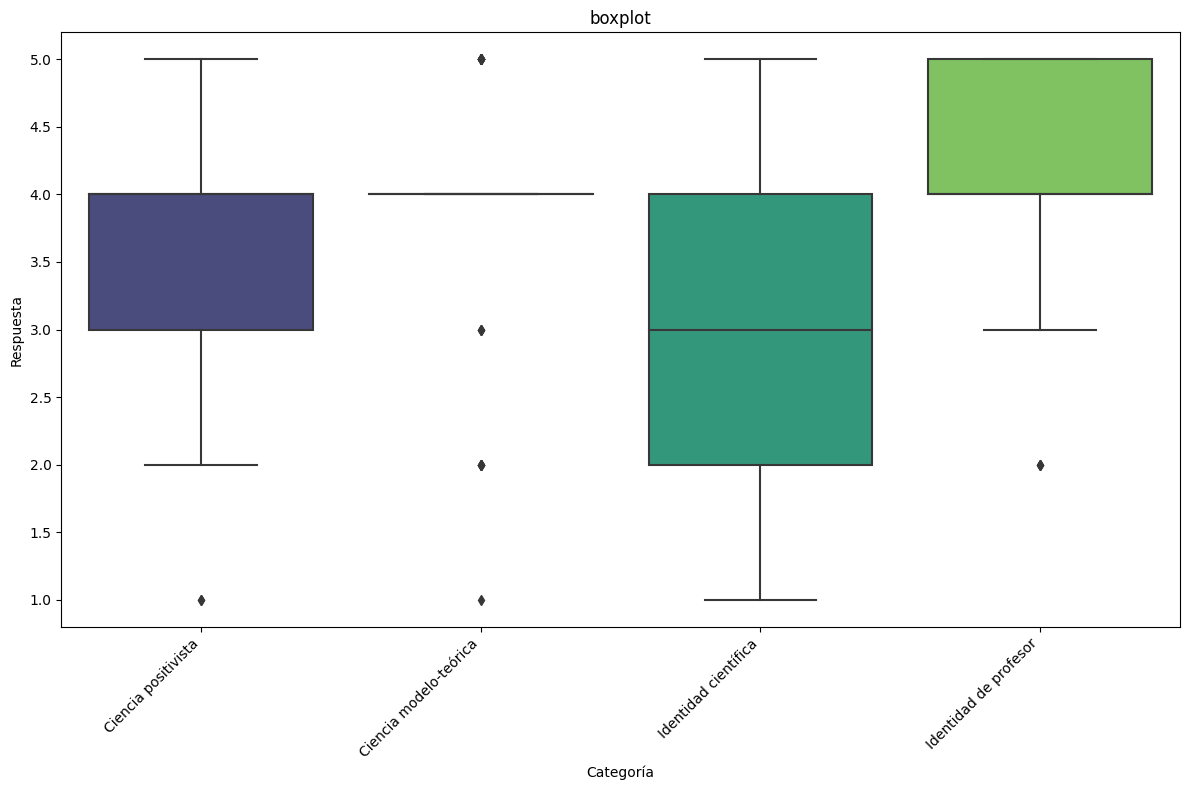

In [26]:

likert_2 = likert.groupby("Categoría")["formulaio.Respuesta"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=likert, 
    x="Categoría", 
    y="formulaio.Respuesta", 
    palette="viridis"  
)

# Add labels and title
plt.xlabel("Categoría")
plt.ylabel("Respuesta")
plt.title("boxplot")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [32]:
likert_corr = likert[['formulaio.Participante','Categoría','formulaio.Respuesta']]
print(likert_corr)

# Pivotar la tabla, usando 'first' para tomar la primera respuesta si hay duplicados
likert_pivoted = likert_corr.pivot_table(
    index='formulaio.Participante',  # Filas = participantes
    columns='Categoría',             # Columnas = categorías
    values='formulaio.Respuesta',    # Valores = respuestas
    aggfunc='first'                  # Tomar la primera respuesta si hay duplicados
)

# Eliminar nombres jerárquicos de columnas si es necesario
likert_pivoted.columns.name = None

# Mostrar el resultado
print(likert_pivoted)

    formulaio.Participante               Categoría  formulaio.Respuesta
0                   Angela     Ciencia positivista                    4
1                   Angela     Ciencia positivista                    4
2                   Angela  Ciencia modelo-teórica                    4
3                   Angela  Ciencia modelo-teórica                    4
4                   Angela  Ciencia modelo-teórica                    4
..                     ...                     ...                  ...
211                 Tarzan  Ciencia modelo-teórica                    4
212                 Tarzan    Identidad científica                    5
213                 Tarzan    Identidad científica                    5
214                 Tarzan   Identidad de profesor                    5
215                 Tarzan   Identidad de profesor                    5

[216 rows x 3 columns]
                        Ciencia modelo-teórica  Ciencia positivista  \
formulaio.Participante                   

In [33]:
likert_pivoted.corr()

,Ciencia modelo-teórica,Ciencia positivista,Identidad científica,Identidad de profesor
Ciencia modelo-teórica,1.000000,-3.592106e-01,4.939146e-01,-8.980265e-02
Ciencia positivista,-0.359211,1.000000e+00,1.387779e-16,-8.326673e-17
Identidad científica,0.493915,1.387779e-16,1.000000e+00,1.250000e-01
Identidad de profesor,-0.089803,-8.326673e-17,1.250000e-01,1.000000e+00


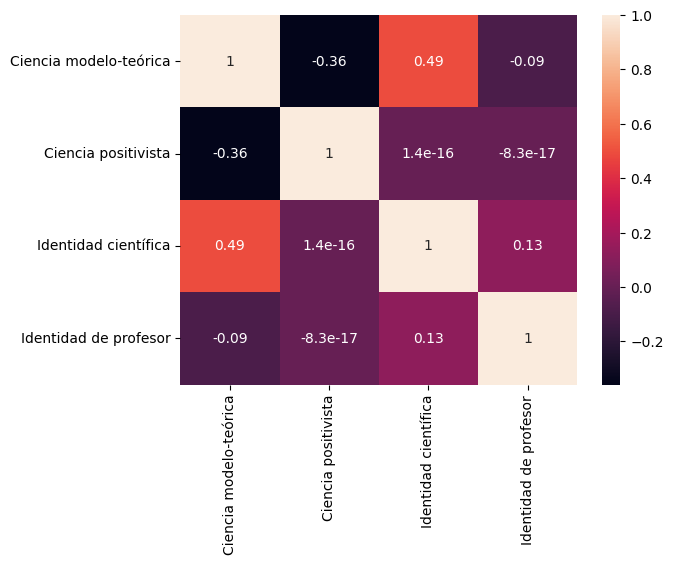

In [34]:
sns.heatmap(likert_pivoted.corr(), annot=True)
plt.show()